<a href="https://colab.research.google.com/github/tejaswini-66/movie-success-/blob/main/movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv("/content/movie_success_rate.csv")

In [4]:
df.shape

(839, 33)

In [5]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    float64
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    float64
 7   Runtime (Minutes)   838 non-null    float64
 8   Rating              839 non-null    float64
 9   Votes               839 non-null    float64
 10  Revenue (Millions)  839 non-null    float64
 11  Metascore           838 non-null    float64
 12  Action              838 non-null    float64
 13  Adventure           838 non-null    float64
 14  Aniimation          838 non-null    float64
 15  Biography           838 non-null    float64
 16  Comedy  

In [11]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

In [14]:
df=df.dropna()
df = df.drop(['Rank', 'Title', 'Description', 'Director', 'Actors'], axis=1)
df

<Axes: >

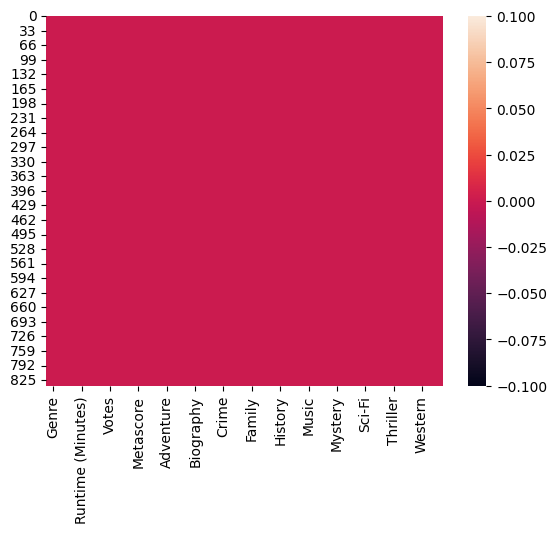

In [15]:
import seaborn as sns
sns.heatmap(df.isnull())

In [18]:
df=df.fillna(df.median())

<ipython-input-18-42d29455c84b>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.median())


Split dataset into train and test

In [20]:
X =df[[
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western']]
y=df['Success']

In [23]:
X.shape


(838, 25)

In [24]:
y.shape

(838,)

train test split

In [32]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train, y_test=train_test_split(X,y)

model selection

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

predciton on x and y

In [34]:
y_pred = model.predict(X_test)

model evelation

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('\nAccuracy:', accuracy)
print('\nConfusion Matrix:')
print(confusion_mat)


Accuracy: 0.9904761904761905

Confusion Matrix:
[[170   0]
 [  2  38]]


Interpertaion of y_pred

In [38]:
success_interpretation = "Successful"if accuracy > 0.5 else "Not Successful"
print('\nMovie Success:', success_interpretation)


Movie Success: Successful


 Calculate ROI and interpretation

In [39]:
buying_price = 2000000  # Assume buying price in dollars
selling_price = 0  # Initialize selling price
successful_movies = y_pred[y_pred == 1]
if len(successful_movies) > 0:
    selling_price = buying_price * (len(successful_movies) / len(y_pred))

roi = (selling_price - buying_price) / buying_price * 100
roi_written = f"{roi:.2f}%"

print('\nROI (Return on Investment):', roi_written)


ROI (Return on Investment): -81.90%


 Interpretation of movie worthiness

In [40]:
worthiness_interpretation = "Worth Buying" if roi > 0 else "Not Worth Buying"
print('\nMovie Worthiness:', worthiness_interpretation)


Movie Worthiness: Not Worth Buying


 Feature importance

In [41]:
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]

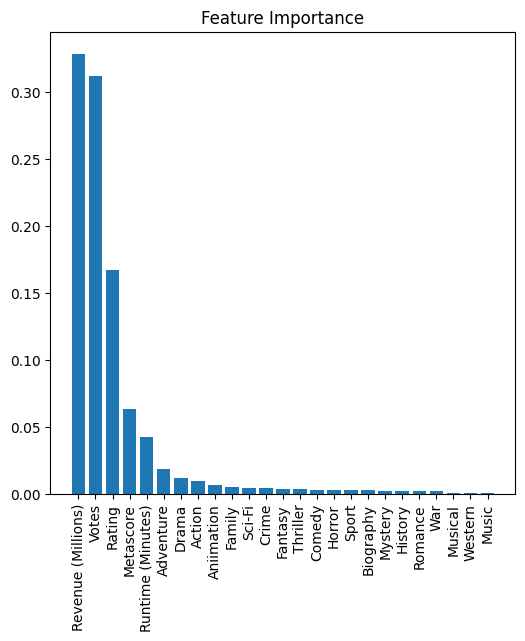

In [43]:
plt.figure(figsize=(6, 6))
plt.title('Feature Importance')
plt.bar(range(len(sorted_features)), feature_importances[sorted_indices])
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.show()